# The Market Campaign, a customer personality analysis

# Loading Dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv",sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


There are few points we can infer out from the above code that is:
- The smallest year in `Year_Birth` column is 1893,which is unusual as per the other data.
- The fields like "AccpetedCm" is telling the number of offers accepted after various campaign, instead of analysing them seperately, we can add them and make a field, which tells total number of offer accepted by any user.
- The `Z_Revenue` and `Z_CostContact` columns have the same value for all the rows, hence makes no difference to the data if we drop them.

# Data Pre-Processing

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

dropping the rows with Null values

In [7]:
df.dropna(inplace = True, axis=0)

Finding the Number of total accepted offer in the campaign 

In [8]:
df["No. of offer Accepted"]=df['AcceptedCmp3']+df['AcceptedCmp5']+df['AcceptedCmp2']+df['AcceptedCmp1']+df['AcceptedCmp4']+df['Response']

In [9]:
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],inplace=True,axis=1)

Dropping the columns having same values for all the records

In [10]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace =True)

Dropping the records where the year of birth is lower than 1940

In [11]:
df.drop(df[df.Year_Birth<1940].index,inplace=True,axis=0)

It is easier to work with Age rather than the Year_Birth in the data, so adding one column `Age` after subtracting the corresponding year of birth from the current year.

In [12]:
from datetime import date
now=date.today().year
now

2022

In [13]:
df['Age']=now-df['Year_Birth']
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2213, dtype: int64

In [14]:
df.dtypes

ID                         int64
Year_Birth                 int64
Education                 object
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Dt_Customer               object
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Complain                   int64
No. of offer Accepted      int64
Age                        int64
dtype: object

Finding the Year from Date of customers

In [15]:
df['Dt_Cust']= pd.to_datetime(pd.Series(df['Dt_Customer']))
df['Dt_Cust']=pd.DatetimeIndex(df['Dt_Cust']).year
df['Dt_Cust']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Cust, Length: 2213, dtype: int64

# Exploratory Data Analysis

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Checking the Age distribution of teh customers

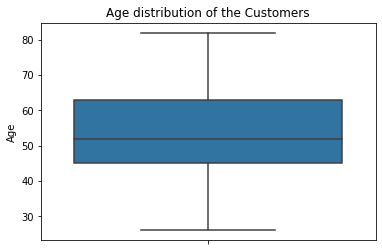

In [17]:
sns.boxplot(y='Age', data=df)
plt.title("Age distribution of the Customers")
plt.show()

The median Age is \~ 50, and goes till 80

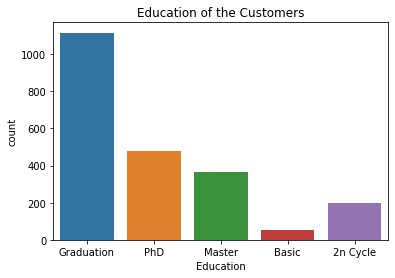

In [18]:
sns.countplot(x='Education',data=df)
plt.title("Education of the Customers")
plt.show()

Most of the customers are `Graduated`,Around 500 have done PhD, the very less number of customers have just `Basic` education.

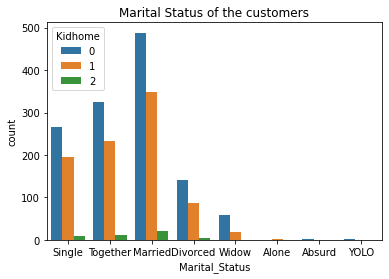

In [19]:
sns.countplot(x='Marital_Status',data=df,hue='Kidhome')
plt.title("Marital Status of the customers")
plt.show()

A large number of Customers are `Married`, The number of together and Single customers are also larger than Divorced, Widow, Alone, Absurd or YOLO.
Also, the very few people have 2 kids at home, mostly either they dont have or just have 1 Kid at home.

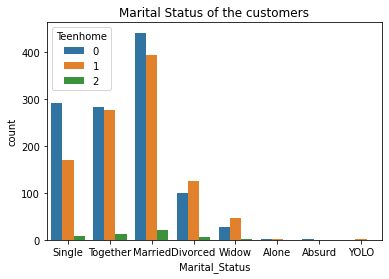

In [20]:
sns.countplot(x='Marital_Status',data=df,hue='Teenhome')
plt.title("Marital Status of the customers")
plt.show()

The trend of kids at home and teens at home is very similar.

<AxesSubplot:xlabel='Recency', ylabel='Count'>

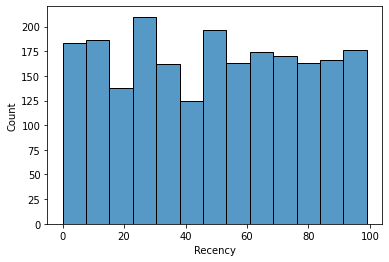

In [21]:
sns.histplot(x='Recency',data=df)

There seems no trend in recency, the count is more than 100 for each bin.

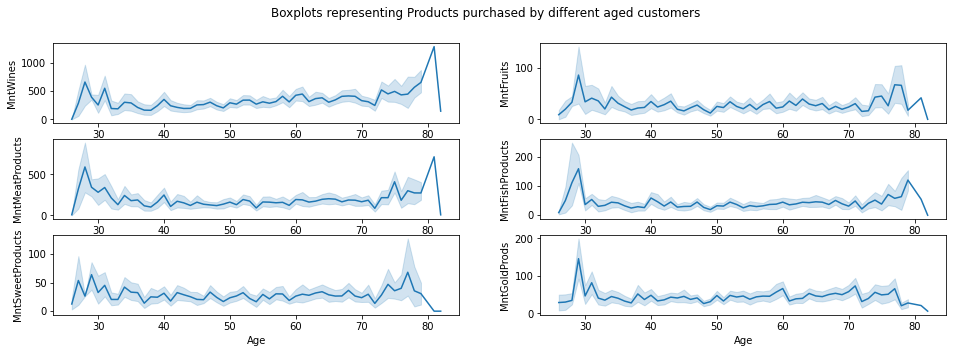

In [22]:
figure, axis = plt.subplots(3,2,figsize=(16,5))
figure.suptitle("Boxplots representing Products purchased by different aged customers")
sns.lineplot(ax=axis[0,0],y='MntWines',x='Age',data=df);
sns.lineplot(ax=axis[0,1],y='MntFruits',x='Age',data=df);
sns.lineplot(ax=axis[1,0],y='MntMeatProducts',x='Age',data=df);
sns.lineplot(ax=axis[1,1],y='MntFishProducts',x='Age',data=df);
sns.lineplot(ax=axis[2,0],y='MntSweetProducts',x='Age',data=df);
sns.lineplot(ax=axis[2,1],y='MntGoldProds',x='Age',data=df);
plt.show()

Except for Sweet Products and Gold products, there is a common trend visible in the all plots, which tells the amount of `Wines, Fruits, Meat Products, Fish Products` are purchased more by the customer which are either 30 and below or 75 and above.
The reason for this could be that, these two categories are not of the people who works, so they may do the shopping for their family.
The Sweet Products are comparbly less purchased, but the oldies purchased more amount of sweet products than any other age category.
The Gold Products were purchased more by the customers of age 30 or so.


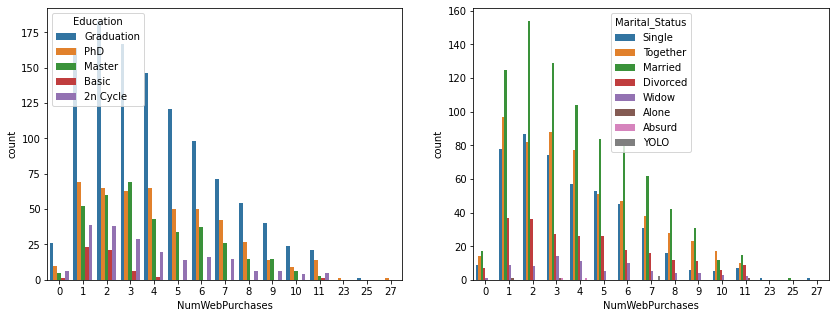

In [23]:
figure1, axis1= plt.subplots(1,2,figsize=(14,5))
sns.countplot(ax=axis1[0],x='NumWebPurchases', hue='Education', data=df)
sns.countplot(ax=axis1[1],x='NumWebPurchases', hue='Marital_Status', data=df)
plt.show()

The Married and Graduated People have done more Web Purchases.

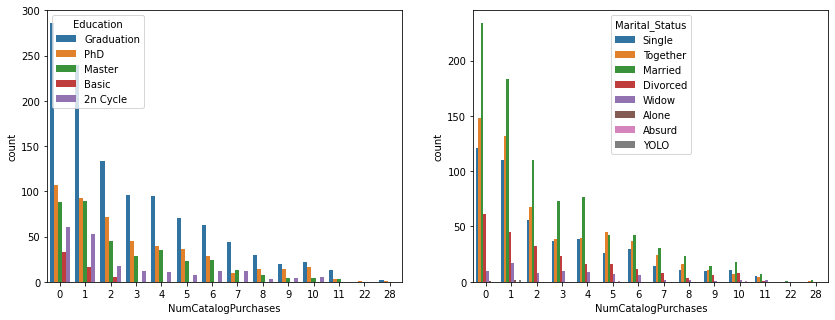

In [24]:
figure2, axis2= plt.subplots(1,2,figsize=(14,5))
sns.countplot(ax=axis2[0],x='NumCatalogPurchases', hue='Education', data=df)
sns.countplot(ax=axis2[1],x='NumCatalogPurchases', hue='Marital_Status', data=df)
plt.show()

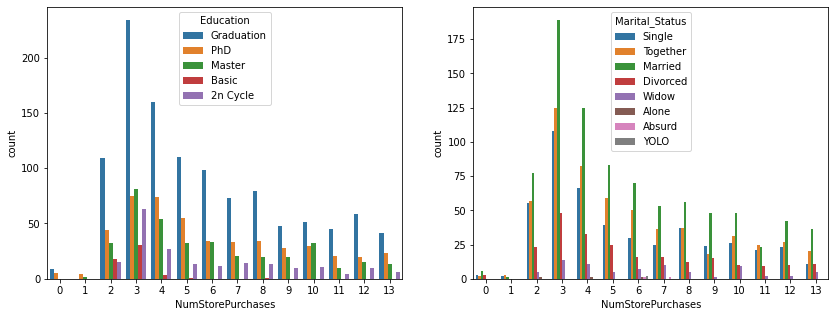

In [25]:
figure3, axis3= plt.subplots(1,2,figsize=(14,5))
sns.countplot(ax=axis3[0],x='NumStorePurchases', hue='Education', data=df)
sns.countplot(ax=axis3[1],x='NumStorePurchases', hue='Marital_Status', data=df)
plt.show()

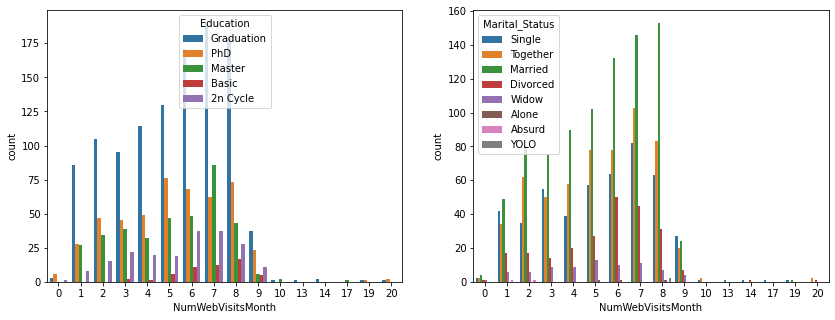

In [26]:
figure4, axis4= plt.subplots(1,2,figsize=(14,5))
sns.countplot(ax=axis4[0],x='NumWebVisitsMonth',hue='Education', data=df)
sns.countplot(ax=axis4[1],x='NumWebVisitsMonth',hue='Marital_Status', data=df)
plt.show()

The Trend in All type of Purchases, remained same.
The Graduated and Married people made more number of purchases than the other categories of people.
Few key points which needs to be highlighted from above plots are:

* The web purchases made were 2 in a month by most of the customers
* The catalog purchases are very few, most of the customers either didnt make a catalog purchase or if make than the number of times is very small.
* Most of the people purchased 3 time from the store.
* The 8 Web visits were made by the most of the customers last month

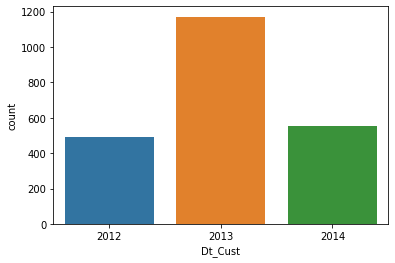

In [27]:
sns.countplot(x='Dt_Cust',data=df)
plt.show()

The most of the customers enrolled in year 2013.

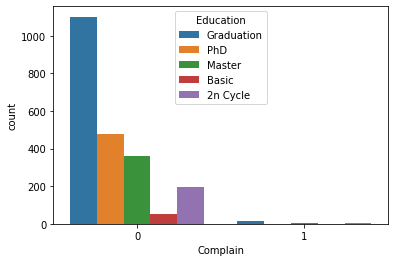

In [28]:
sns.countplot(x='Complain', hue='Education', data=df)
plt.show()

The reason of here adding Education as hue is that more educated a person is, more aware he is about his rights, but here the complaint made by the customers are negligible, the reason behind this could be that the company try to provide good services to its customers.
OR 
The dont register the complaints regularly and try to sort the issue without registering the complaints

# Summary of the EDA

1. Most of the customers are Graduated and Married, so company should try to target such customers
2. Customers are mostly 50 and higher age
3. It was found that the few categories of product are purchased by the extreme two aged customers(i.e., ~30 and ~80)
4. Most of the customers were enrolled in 2013.

### `May edit this later`